In [43]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [45]:
# Load data with raw string path
df = pd.read_csv(r'C:\Users\j0653\Downloads\flipkart_com-ecommerce_sample.csv\flipkart_com-ecommerce_sample.csv')

In [49]:
# Data Cleaning
# ----------------------------------------------
# Handle ratings
df['product_rating'] = df['product_rating'].replace('No rating available', np.nan)
df['product_rating'] = pd.to_numeric(df['product_rating'])

# Extract main category from nested hierarchy
df['main_category'] = df['product_category_tree'].str.split('>>').str[0].str.replace(r'[\[\]" ]', '', regex=True)

# Calculate discount percentage
df['discount_%'] = ((df['retail_price'] - df['discounted_price']) / df['retail_price']) * 100
df['discount_%'] = df['discount_%'].round(1)

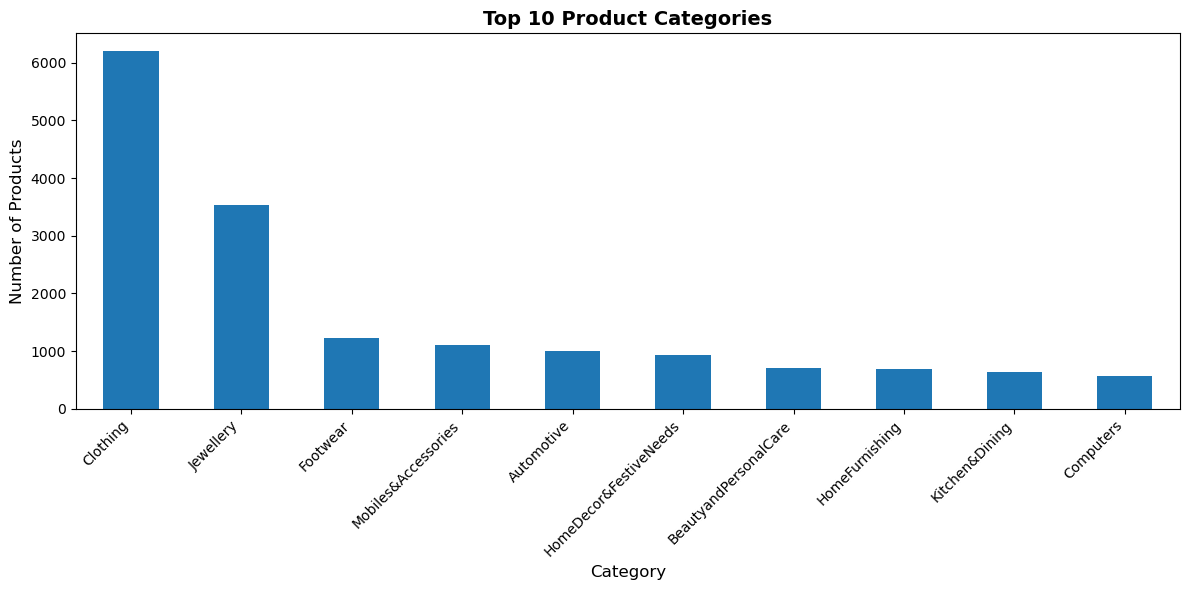

In [51]:
# Visualization 1: Top 10 Categories
# ----------------------------------------------
plt.figure(figsize=(12,6))
top_cats = df['main_category'].value_counts().nlargest(10)
top_cats.plot(kind='bar', color='#1f77b4')
plt.title("Top 10 Product Categories", fontweight='bold', fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'C:\Users\j0653\Downloads\top_categories.png', dpi=300, bbox_inches='tight')
plt.show()

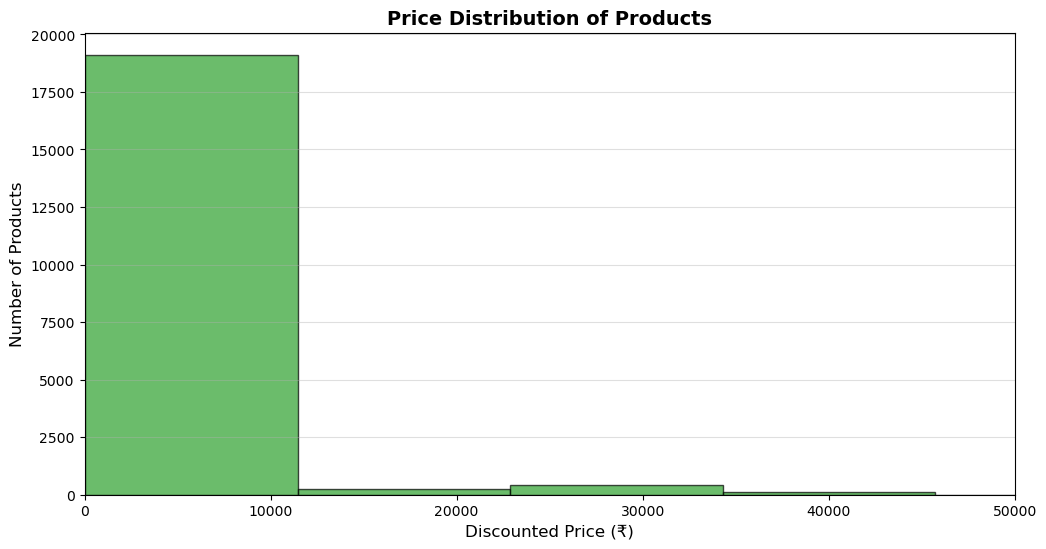

In [53]:
# Visualization 2: Price Distribution
# ----------------------------------------------
plt.figure(figsize=(12,6))
plt.hist(df['discounted_price'], bins=50, color='#2ca02c', edgecolor='black', alpha=0.7)
plt.title("Price Distribution of Products", fontweight='bold', fontsize=14)
plt.xlabel("Discounted Price (₹)", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.xlim(0, 50000)  # Adjust based on your data
plt.grid(axis='y', alpha=0.4)
plt.savefig(r'C:\Users\j0653\Downloads\price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


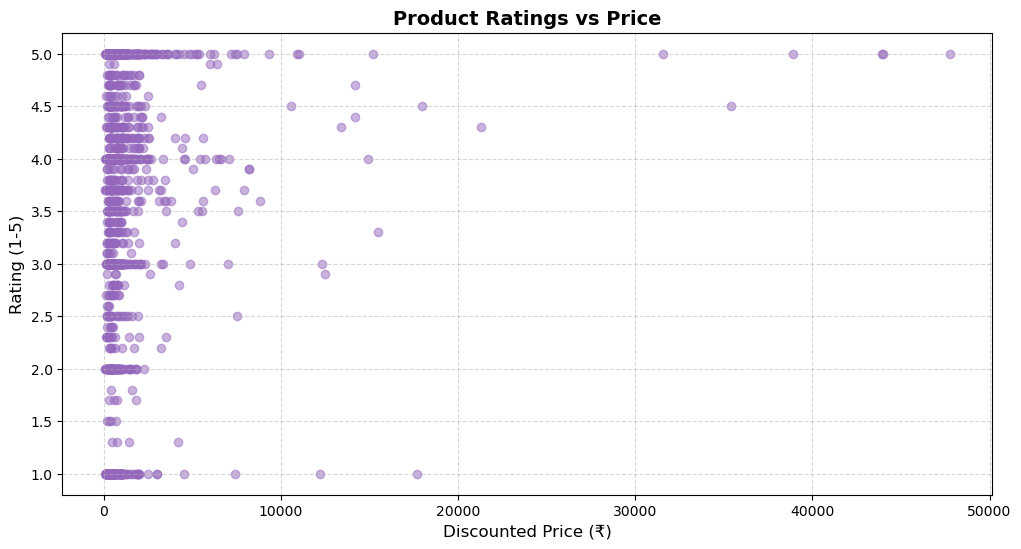

In [55]:
# Visualization 3: Ratings vs Price
# ----------------------------------------------
plt.figure(figsize=(12,6))
plt.scatter(df['discounted_price'], df['product_rating'], alpha=0.5, color='#9467bd')
plt.title("Product Ratings vs Price", fontweight='bold', fontsize=14)
plt.xlabel("Discounted Price (₹)", fontsize=12)
plt.ylabel("Rating (1-5)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(r'C:\Users\j0653\Downloads\ratings_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()

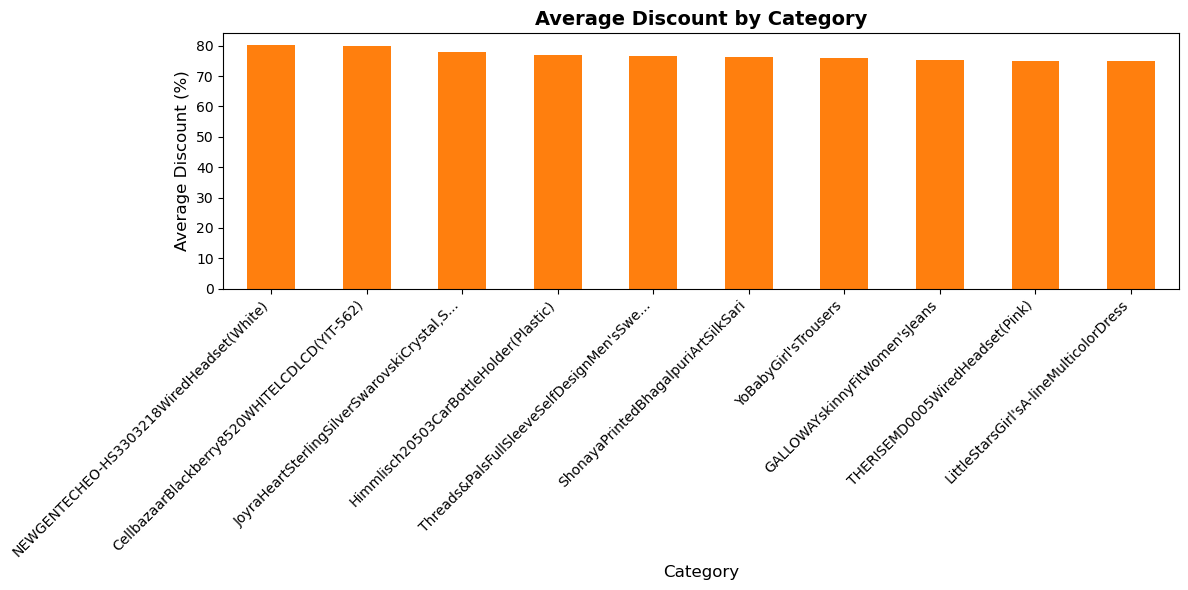

In [57]:
# Visualization 4: Discounts by Category
# ----------------------------------------------
plt.figure(figsize=(12,6))
discount_stats = df.groupby('main_category')['discount_%'].mean().sort_values(ascending=False).head(10)
discount_stats.plot(kind='bar', color='#ff7f0e')
plt.title("Average Discount by Category", fontweight='bold', fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Average Discount (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'C:\Users\j0653\Downloads\discounts_by_category.png', dpi=300, bbox_inches='tight')
plt.show()
